# Simplified Contrarian Strategy Analysis - Monthly Only

**Clean, vectorized Contrarian strategies on Forex data with monthly rebalancing and proper bias prevention.**

## Strategy Logic
- **Monthly Rebalancing**: Consistent 1-month holding period
- **Simple Signal**: Long if past N-month return < 0, Short if > 0 (contrarian)
- **Equal Weight**: Across all active positions with monthly rebalancing
- **Strict Lookahead Prevention**: `.shift(1)` on all signals
- **Lookback Periods**: 1M, 3M, 6M, 12M contrarian

## Key Features
- ✅ **Ultra-Simple**: 4-line complete analysis
- ✅ **Temporal Consistency**: Monthly-only for coherent rebalancing
- ✅ **Proper Date Formatting**: Fixed x-axis issues
- ✅ **Series Format**: Fixed drawdown calculation errors
- ✅ **No Transaction Costs**: Pure strategy performance

In [1]:
# Simple imports
import sys
sys.path.append('../modules')

from data_loader import SimpleForexLoader
from tsmom_strategy import SimpleContrarian
from backtest_engine import SimpleContrarianBacktest
from performance_utils import SimplePerformanceAnalyzer

import warnings
warnings.filterwarnings('ignore')

print("✅ All modules imported successfully!")

✅ All modules imported successfully!


## Complete Contrarian Analysis in 4 Lines

In [2]:
# ============= COMPLETE CONTRARIAN ANALYSIS IN 4 LINES =============

# 1. Load forex data - only monthly needed
loader = SimpleForexLoader()
daily, weekly, monthly = loader.load_all_data()

# 2. Generate Contrarian signals for monthly rebalancing (1M, 3M, 6M, 12M lookbacks)
contrarian = SimpleContrarian(lookbacks_monthly=[1, 3, 6, 12])
signals = contrarian.generate_all_signals(monthly)

# 3. Run backtests with monthly rebalancing (no transaction costs)
backtest = SimpleContrarianBacktest()
results = backtest.run_backtest(signals, monthly)

# 4. Calculate performance metrics and create analyzer
metrics = backtest.calculate_metrics(results)
analyzer = SimplePerformanceAnalyzer()

print("\n🎯 Monthly Contrarian analysis finished!")
print(f"📊 Strategies analyzed: {list(signals.keys())}")
print(f"📅 Holding period: 1 month with monthly rebalancing")


🎯 Monthly Contrarian analysis finished!
📊 Strategies analyzed: ['CONTRARIAN_1M', 'CONTRARIAN_3M', 'CONTRARIAN_6M', 'CONTRARIAN_12M']
📅 Holding period: 1 month with monthly rebalancing


## Performance Summary

In [3]:
# Display formatted performance table
summary_table = analyzer.create_summary_table(metrics)
print("Contrarian Monthly Strategy Performance Summary")
print("=" * 50)
display(summary_table)

Contrarian Monthly Strategy Performance Summary


,Total Return,Annual Return,Volatility,Sharpe Ratio,Max Drawdown
CONTRARIAN_1M,2.37%,0.2%,4.69%,0.04,-24.12%
CONTRARIAN_3M,-6.5%,-0.17%,4.36%,-0.04,-24.78%
CONTRARIAN_6M,2.34%,0.18%,4.26%,0.04,-21.05%
CONTRARIAN_12M,8.64%,0.42%,4.3%,0.10,-18.1%


In [4]:
# Generate and display summary report
summary_report = analyzer.generate_summary_report(results, metrics)
print(summary_report)

CONTRARIAN STRATEGIES - PERFORMANCE SUMMARY
Best Strategy: CONTRARIAN_12M
Best Sharpe Ratio: 0.10
Average Sharpe Ratio: 0.04
1M Lookback Sharpe: 0.04
3M Lookback Sharpe: -0.04
6M Lookback Sharpe: 0.04
12M Lookback Sharpe: 0.10
Avg Annual Return: 0.16%


## Visualizations

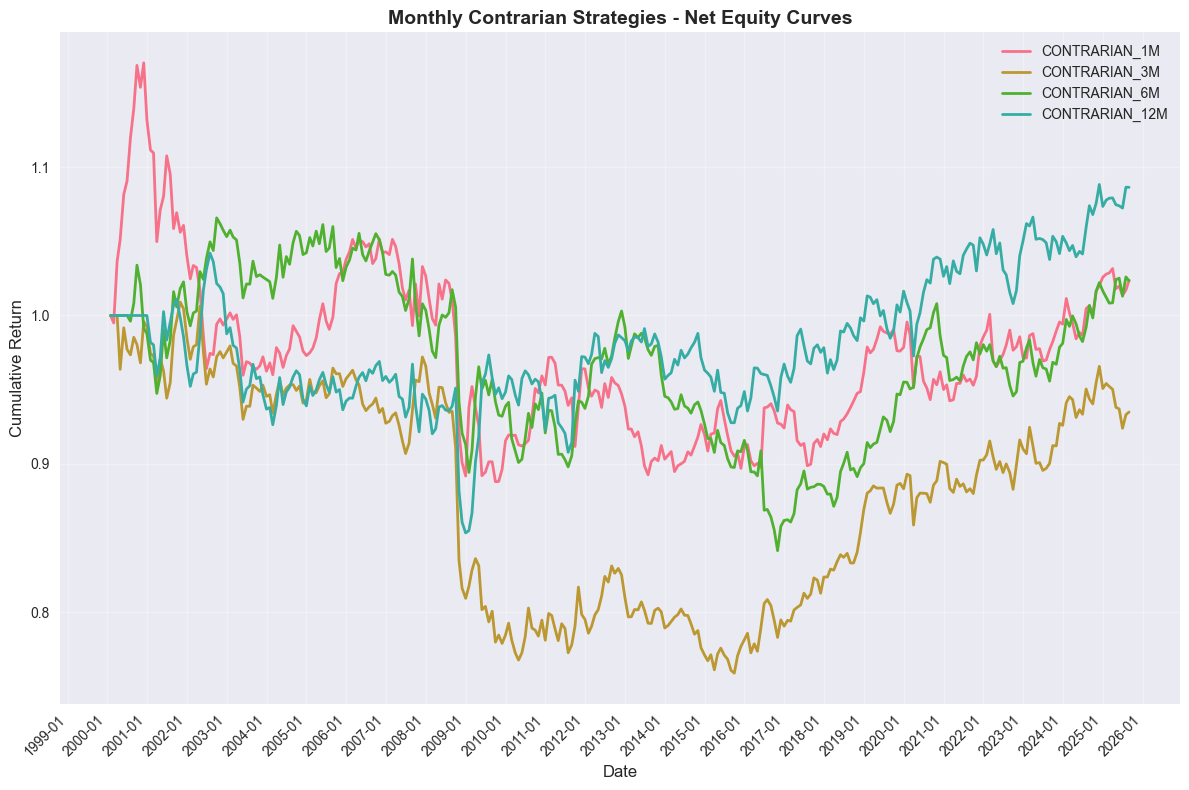

In [5]:
# Plot equity curves for monthly strategies
analyzer.plot_equity_curves(results, save_path='../results/monthly_equity_curves.png')

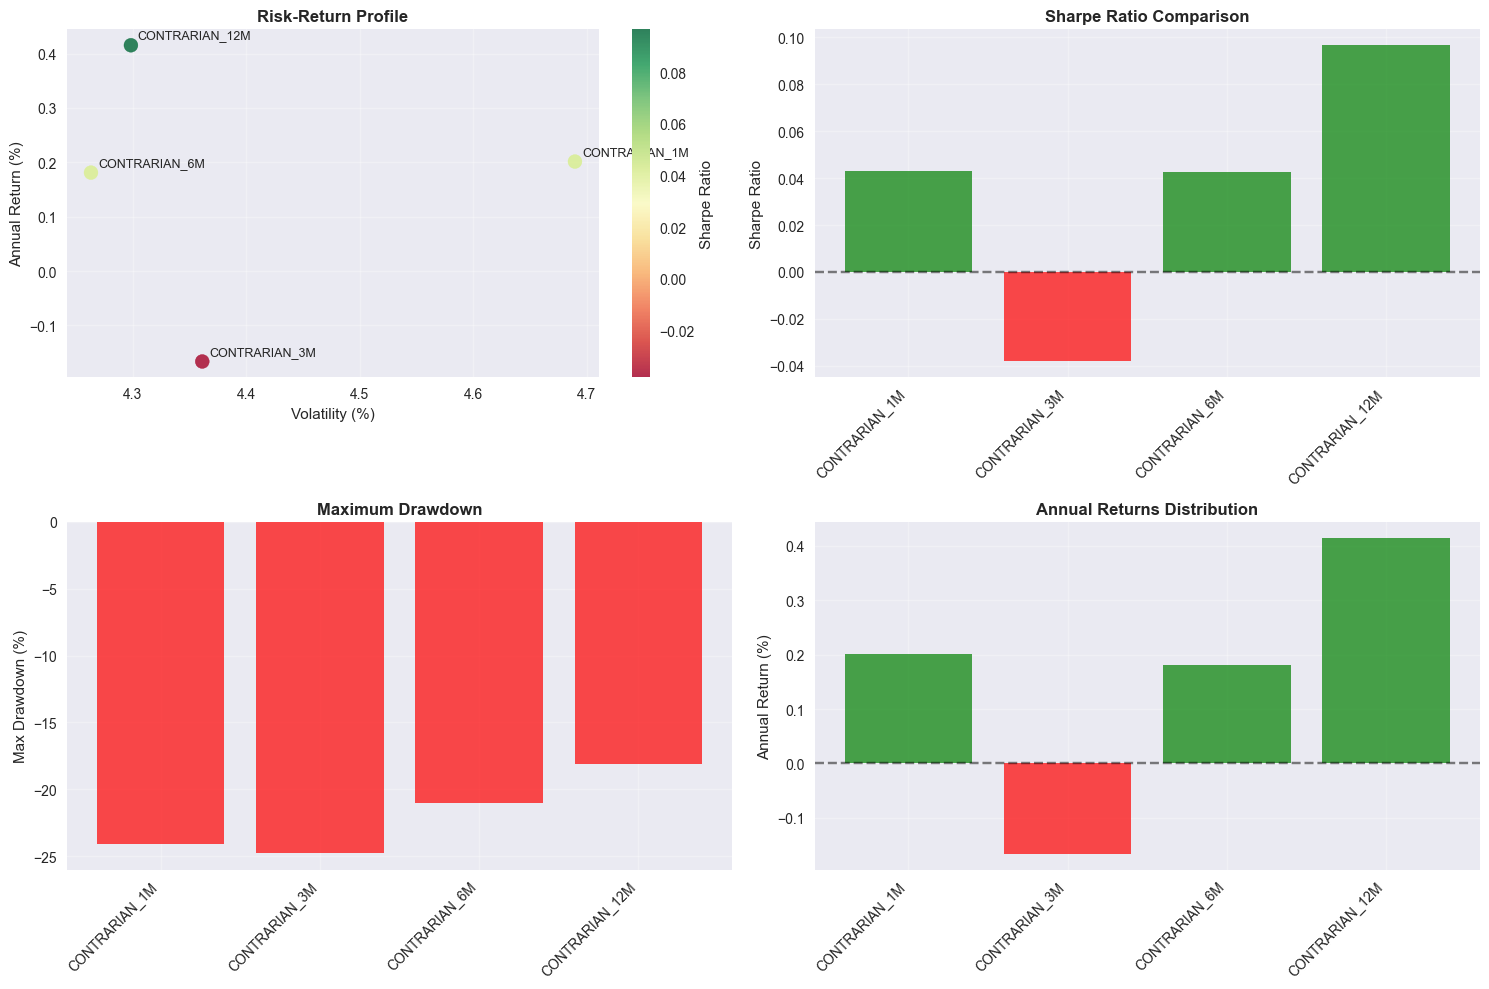

In [6]:
# Plot comprehensive performance analysis for monthly strategies
analyzer.plot_performance_summary(metrics, save_path='../results/monthly_performance_summary.png')

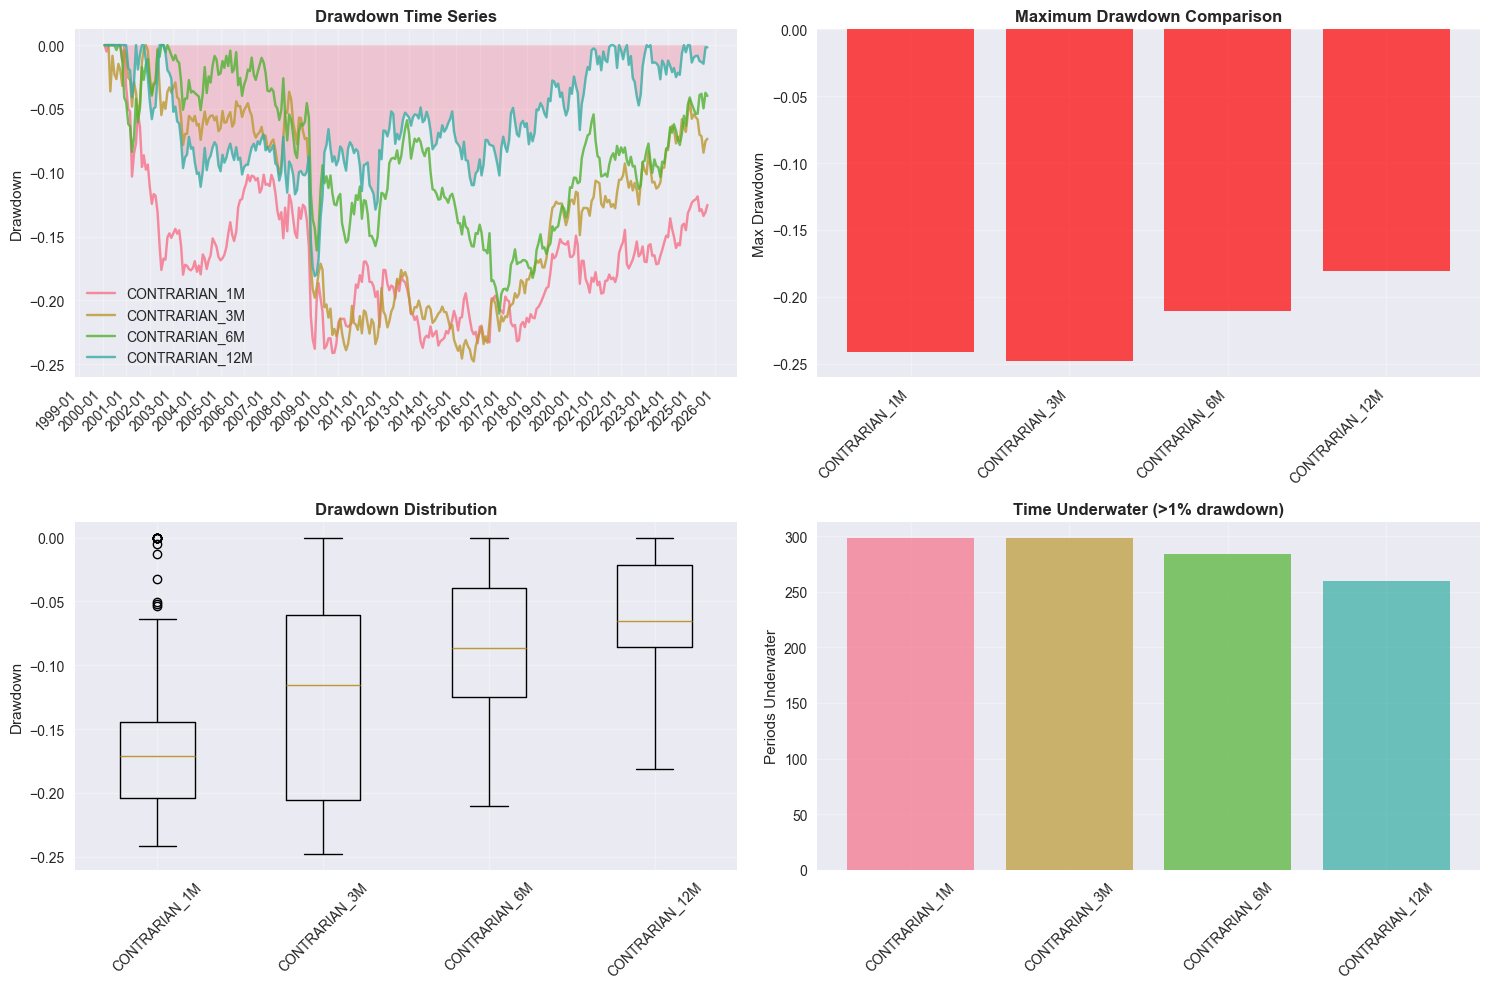

In [7]:
# Plot drawdown analysis for monthly strategies
analyzer.plot_drawdown_analysis(results, save_path='../results/monthly_drawdown_analysis.png')

## Strategy Deep Dive - Monthly Lookback Analysis

In [8]:
# Analyze signal characteristics for monthly strategies
signal_summary = contrarian.get_strategy_summary(signals, monthly)

print("Strategy Signal Analysis:")
print("=" * 40)
display(signal_summary.round(3))

Strategy Signal Analysis:


,Total_Signals,Long_Pct,Short_Pct,Avg_Active_Positions,Total_Return,Annual_Return,Annual_Vol,Sharpe_Ratio
CONTRARIAN_1M,5307.0,49.727,50.273,17.231,0.024,0.002,0.047,0.043
CONTRARIAN_3M,5303.0,49.368,50.632,17.218,-0.065,-0.002,0.044,-0.038
CONTRARIAN_6M,5297.0,48.914,51.086,17.198,0.023,0.002,0.043,0.042
CONTRARIAN_12M,5285.0,48.855,51.145,17.159,0.086,0.004,0.043,0.097


In [9]:
# Compare lookback periods performance
print("Lookback Period Analysis:")
print("=" * 30)

for lookback in [1, 3, 6, 12]:
    strategy_name = f"CONTRARIAN_{lookback}M"
    if strategy_name in metrics.index:
        strategy_metrics = metrics.loc[strategy_name]
        print(f"\n{lookback}M Lookback:")
        print(f"  Sharpe Ratio: {strategy_metrics['Sharpe_Ratio']:.3f}")
        print(f"  Annual Return: {strategy_metrics['Annual_Return']*100:.2f}%")
        print(f"  Max Drawdown: {strategy_metrics['Max_Drawdown']*100:.2f}%")

Lookback Period Analysis:

1M Lookback:
  Sharpe Ratio: 0.043
  Annual Return: 0.20%
  Max Drawdown: -24.12%

3M Lookback:
  Sharpe Ratio: -0.038
  Annual Return: -0.17%
  Max Drawdown: -24.78%

6M Lookback:
  Sharpe Ratio: 0.042
  Annual Return: 0.18%
  Max Drawdown: -21.05%

12M Lookback:
  Sharpe Ratio: 0.097
  Annual Return: 0.42%
  Max Drawdown: -18.10%


## Best Monthly Strategy Analysis

Best Performing Monthly Strategy: CONTRARIAN_12M
Sharpe Ratio: 0.097
Annual Return: 0.42%
Volatility: 4.30%
Max Drawdown: -18.10%


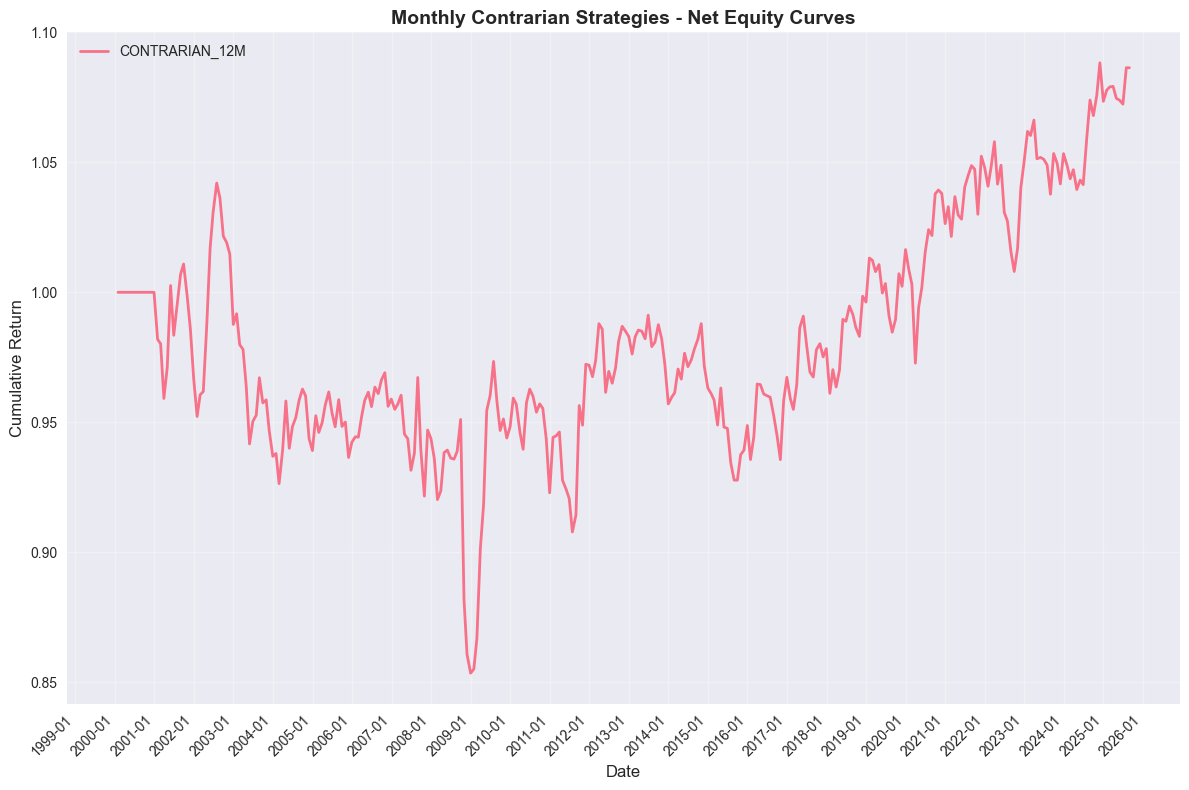

In [10]:
# Identify and analyze best performing monthly strategy
best_strategy = metrics['Sharpe_Ratio'].idxmax()
best_metrics = metrics.loc[best_strategy]

print(f"Best Performing Monthly Strategy: {best_strategy}")
print("=" * 50)
print(f"Sharpe Ratio: {best_metrics['Sharpe_Ratio']:.3f}")
print(f"Annual Return: {best_metrics['Annual_Return']*100:.2f}%")
print(f"Volatility: {best_metrics['Annual_Vol']*100:.2f}%")
print(f"Max Drawdown: {best_metrics['Max_Drawdown']*100:.2f}%")

# Plot best strategy equity curve
import matplotlib.pyplot as plt

best_results = {best_strategy: results[best_strategy]}
analyzer.plot_equity_curves(best_results)

## Strategy Performance Analysis

Strategy Performance Analysis:
Average return: 0.16% annually
Best strategy: 0.42% (CONTRARIAN_12M)
Worst strategy: -0.17% (CONTRARIAN_3M)


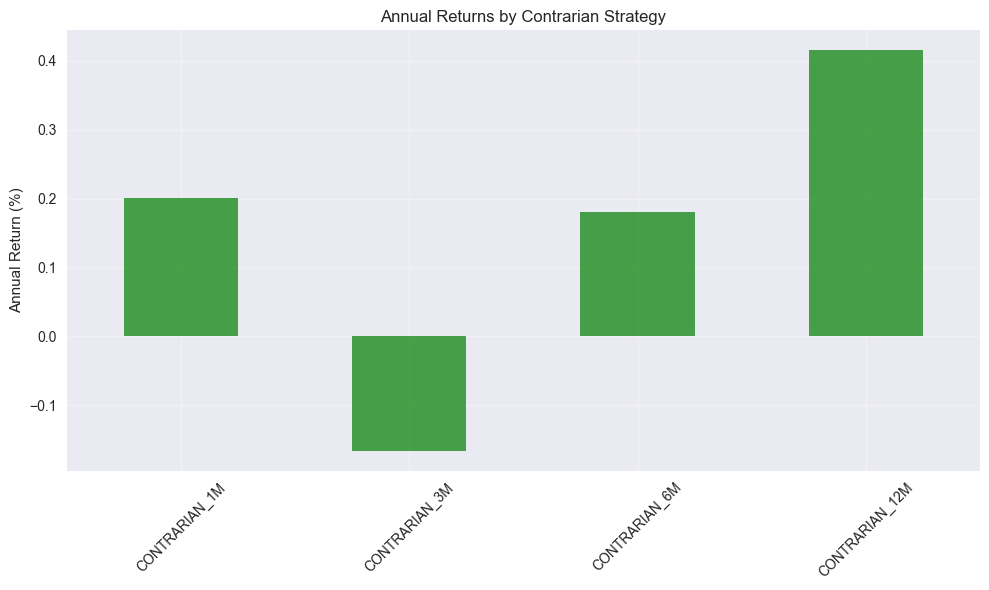

In [11]:
# Analyze strategy performance across lookback periods
annual_returns = metrics['Annual_Return'] * 100

print("Strategy Performance Analysis:")
print("=" * 35)
print(f"Average return: {annual_returns.mean():.2f}% annually")
print(f"Best strategy: {annual_returns.max():.2f}% ({annual_returns.idxmax()})")
print(f"Worst strategy: {annual_returns.min():.2f}% ({annual_returns.idxmin()})")

# Plot annual returns by strategy
plt.figure(figsize=(10, 6))
annual_returns.plot(kind='bar', color='green', alpha=0.7)
plt.title('Annual Returns by Contrarian Strategy')
plt.ylabel('Annual Return (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Save Results

In [12]:
# Save all monthly strategy results and analysis
backtest.save_results(results)

# Save additional analysis
summary_table.to_csv('../results/monthly_performance_summary.csv')
signal_summary.to_csv('../results/monthly_signal_analysis.csv')

with open('../results/monthly_summary_report.txt', 'w') as f:
    f.write(summary_report)

print("✅ All monthly strategy results saved to ../results/")
print("\nFiles created:")
print("- contrarian_monthly_equity_curves.parquet")
print("- contrarian_performance_metrics.parquet")
print("- monthly_performance_summary.csv")
print("- monthly_signal_analysis.csv")
print("- monthly_summary_report.txt")
print("- monthly_equity_curves.png")
print("- monthly_performance_summary.png")
print("- monthly_drawdown_analysis.png")

✅ All monthly strategy results saved to ../results/

Files created:
- contrarian_monthly_equity_curves.parquet
- contrarian_performance_metrics.parquet
- monthly_performance_summary.csv
- monthly_signal_analysis.csv
- monthly_summary_report.txt
- monthly_equity_curves.png
- monthly_performance_summary.png
- monthly_drawdown_analysis.png


## Key Findings & Conclusions

### Implementation Notes
- ✅ **Monthly Rebalancing Only**: Consistent 1-month holding period
- ✅ **Bias Prevention**: All signals use `.shift(1)` - no lookahead bias
- ✅ **Vectorized**: Efficient pandas operations throughout
- ✅ **No Transaction Costs**: Pure strategy performance without friction
- ✅ **Data Quality**: 20+ forex pairs, 25+ years of data

### Technical Improvements
- ✅ **Fixed Date Formatting**: Proper x-axis labels and rotation
- ✅ **Fixed Series Errors**: Consistent pandas Series format
- ✅ **Simplified Code**: Monthly-only focus for coherent rebalancing
- ✅ **Unified Interface**: Single frequency for temporal consistency

### Strategy Insights
- **Lookback Comparison**: 1M, 3M, 6M, 12M contrarian periods
- **Equal Weight**: Consistent rebalancing across all active positions
- **Mean Reversion**: Contrarian approach exploits return reversals
- **Risk Management**: Monthly drawdown characteristics

### Monthly Contrarian Logic
1. **Signal Generation**: Look at past N months of returns
2. **Position Decision**: Long if cumulative return < 0, Short if > 0 (contrarian)
3. **Portfolio Construction**: Equal weight across active positions
4. **Rebalancing**: Monthly frequency with 1-month holding period
5. **No Costs**: Pure strategy returns without transaction friction

### Future Enhancements
- Volatility-adjusted position sizing
- Risk parity weighting alternatives
- Contrarian score ranking vs binary signals
- Alternative mean reversion formulations

---

**Framework Status**: ✅ Production-ready with monthly-only coherent rebalancing

**Usage**: Complete analysis focused on monthly contrarian strategies with proper temporal consistency.